In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [33]:
%matplotlib inline

In [3]:
df = pd.read_csv("ODC_Airbnb.csv")
df.head(5)

,ID,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,Restaurant Price Index,Local Purchasing Power Index,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,91.8,129.9,208.1,153.3,69.9,75.0,8.8,23.4,27.6,87.5
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,91.8,129.9,208.1,153.3,69.9,75.0,8.8,23.4,27.6,87.5
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,91.8,129.9,208.1,153.3,69.9,75.0,8.8,23.4,27.6,87.5
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,91.8,129.9,208.1,153.3,69.9,75.0,8.8,23.4,27.6,87.5
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,91.8,129.9,208.1,153.3,69.9,75.0,8.8,23.4,27.6,87.5


In [150]:
import pandas as pd

# Assume your DataFrame is called df
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", numerical_cols)


Categorical columns: ['room_type', 'city', 'day_type', 'Country']
Numerical columns: Index(['ID', 'realSum', 'person_capacity', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Quality of Life Index', 'Purchasing Power Index', 'Safety Index',
       'Health Care Index', 'Property Price to Income Ratio',
       'Traffic Commute Time Index', 'Pollution Index', 'Climate Index'],
      dtype='object')


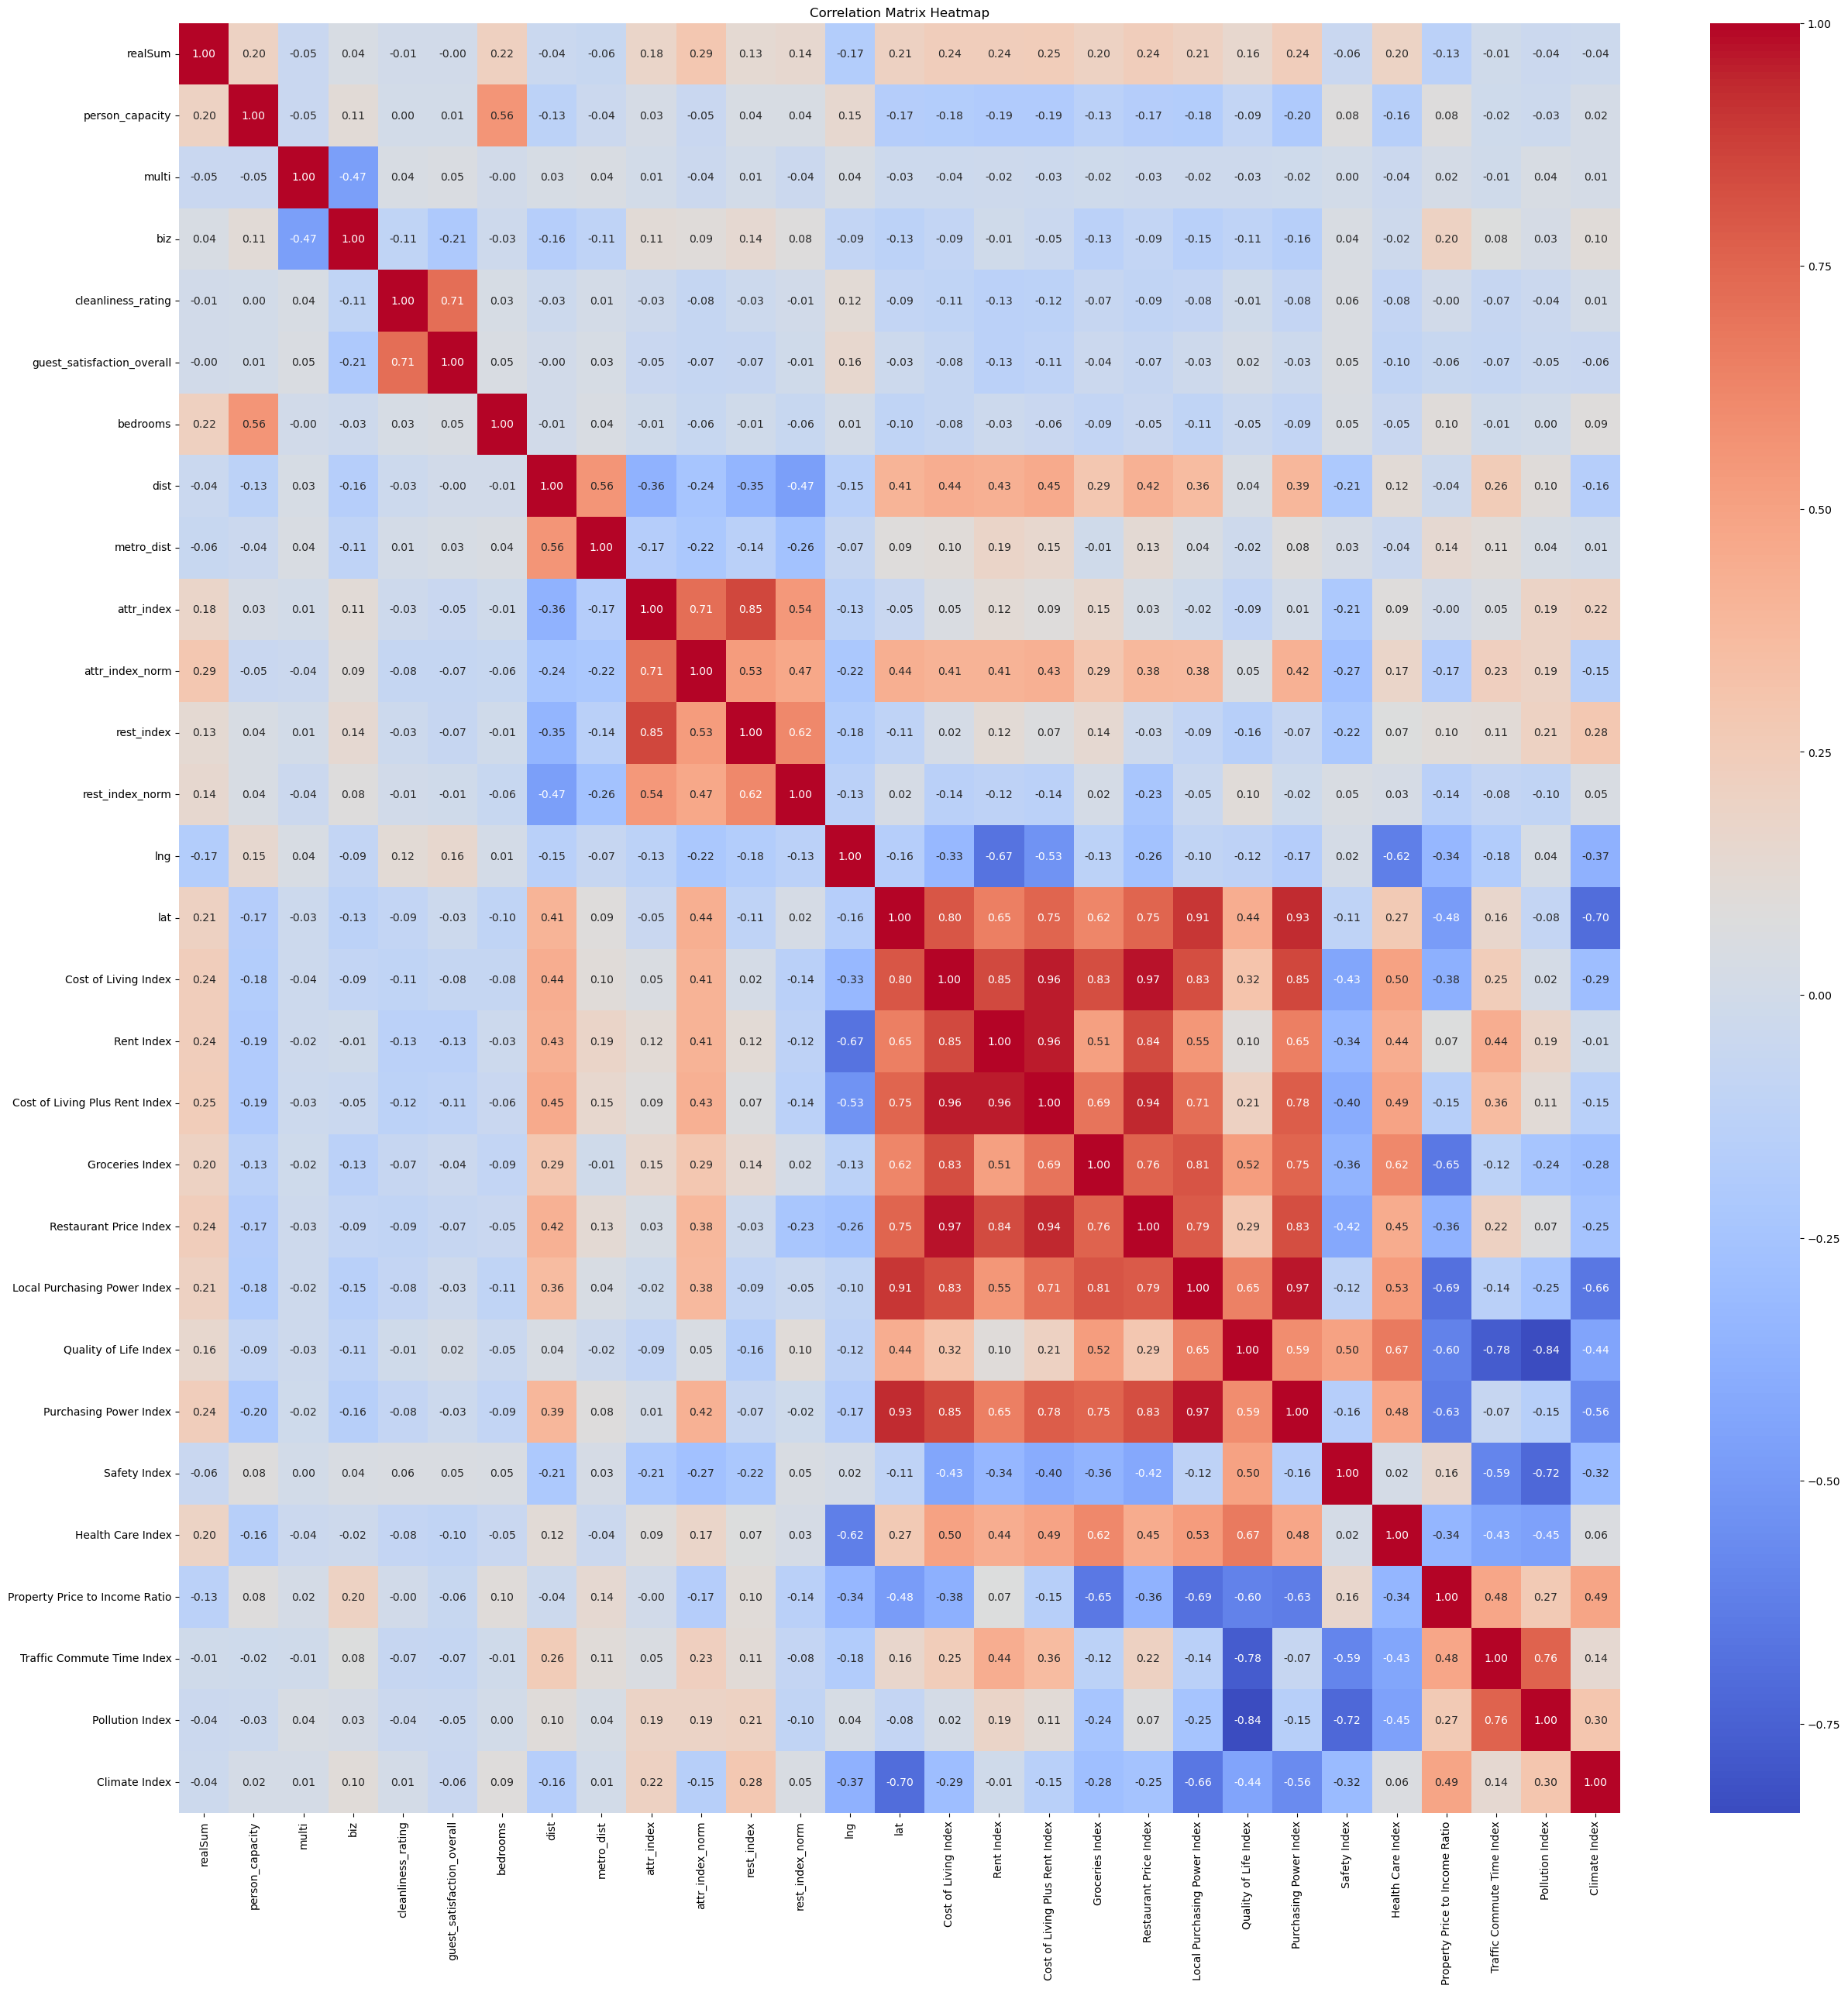

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns from df
numerical_df = df[numerical_cols]

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [4]:
df = df[['realSum','room_type', 'city','bedrooms','Rent Index','person_capacity','Health Care Index','attr_index']]

In [5]:
df

,realSum,room_type,city,bedrooms,Rent Index,person_capacity,Health Care Index,attr_index
0,194.033698,Private room,amsterdam,1,60.0,2,75.0,78.690379
1,344.245776,Private room,amsterdam,1,60.0,4,75.0,631.176378
2,264.101422,Private room,amsterdam,1,60.0,2,75.0,75.275877
3,433.529398,Private room,amsterdam,2,60.0,4,75.0,493.272534
4,485.552926,Private room,amsterdam,1,60.0,2,75.0,552.830324
...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,vienna,3,29.6,6,78.9,219.402478
51703,304.793960,Entire home/apt,vienna,1,29.6,2,78.9,204.970121
51704,637.168969,Entire home/apt,vienna,1,29.6,2,78.9,169.073402
51705,301.054157,Private room,vienna,1,29.6,2,78.9,109.236574


In [6]:
categorical_cols = ['room_type', 'city']
numerical_cols = ['bedrooms', 'Rent Index', 'person_capacity',
                  'Health Care Index', 'attr_index']


In [7]:
for col in numerical_cols + ['realSum']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


bedrooms: 15374 outliers
Rent Index: 21375 outliers
person_capacity: 0 outliers
Health Care Index: 0 outliers
attr_index: 2237 outliers
realSum: 3662 outliers


In [8]:
for col in numerical_cols+ ['realSum']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound,
                       np.where(df[col] < lower_bound, lower_bound, df[col]))


In [9]:
for col in numerical_cols + ['realSum']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


bedrooms: 0 outliers
Rent Index: 0 outliers
person_capacity: 0 outliers
Health Care Index: 0 outliers
attr_index: 0 outliers
realSum: 0 outliers


In [10]:
# Target
y = df['realSum']

# Features (drop target column)
X = df.drop(columns=['realSum'])


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),   # normalize numerical
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # encode categorical
    ]
)


In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Run LazyPredict Regressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Show results
print(models)


  0%|          | 0/42 [00:00<?, ?it/s]

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split

models = {
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'LinearRegression': LinearRegression()
}

results = {}

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    
    results[name] = {
        'R2_test': r2_score(y_test, y_pred),
        'RMSE_test': mean_squared_error(y_test, y_pred)
    }

print(pd.DataFrame(results).T)


                        R2_test    RMSE_test
DecisionTreeRegressor  0.749653  4962.874962
RandomForestRegressor  0.767759  4603.947841
KNeighborsRegressor    0.684936  6245.822976
LinearRegression       0.619669  7539.682503
